# **DATA PRE-PROCESSING**



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from scipy.stats import zscore
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mail_data.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df = df.dropna()

In [ ]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
categorical = df.select_dtypes(include=np.object)
categorical.head()

<ipython-input-7-614926644c4e>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = df.select_dtypes(include=np.object)


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
num_categories = df['Category'].nunique()

print(f"The 'Category' column has {num_categories} distinct categories.")

The 'Category' column has 2 distinct categories.


In [ ]:
categories = df['Category'].unique()

print("Distinct categories in the 'Category' column:")
for category in categories:
    print(category)

Distinct categories in the 'Category' column:
ham
spam


In [ ]:
df.Category

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

 To find the percentage of missing values, duplicate values

In [ ]:
missingPercent = (df.isna().sum() / len(df)) *100
missingPercent[missingPercent > 0 ]

Series([], dtype: float64)

In [ ]:
duplicatePercent = df.duplicated().sum() * 100 / len(df)
print(f'The percentage of duplicated values - {duplicatePercent}')

The percentage of duplicated values - 7.447954055994257


Impute the missing data - interpolation, mean, mode and Droping column

In [ ]:
column_name = 'Category'
most_frequent_Category = df[column_name].mode()[0]
df[column_name].fillna(category, inplace=True)
print(df.isna().sum())

Category    0
Message     0
dtype: int64


In [ ]:
tf = df.copy()
tf['Category'].fillna(tf['Category'].mode()[0], inplace=True)
tf.isna().sum()

Category    0
Message     0
dtype: int64

In [ ]:
tf = df.copy()
tf['Category'].fillna(tf['Category'].interpolate(), inplace=True)
tf.isna().sum()

Category    0
Message     0
dtype: int64

# **EMAIL SPAM DETECTION USING ADA_BOOST**

### **Separate features and labels**

In [ ]:
X = df['Message']
y = df['Category']

### **Training Percentage**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Convert text data into a matrix of token counts.**

In [ ]:
vectorizer = CountVectorizer()
X_train = X_train.astype(str)
X_test = X_test.astype(str)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

### **Create an AdaBoost classifier (Ensemble Technique) with decision tree as the base estimator, multiple weak classifiers (base estimators)**

In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50)

### **Train the AdaBoost classifier**

In [ ]:
adaboost.fit(X_train_vectorized, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

### **Prediction on the basis of training**

In [ ]:
y_pred = adaboost.predict(X_test_vectorized)

### **Calculate accuracy**


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9704035874439462


### **Calculate precision**

In [ ]:
precision = precision_score(y_test, y_pred, pos_label='ham')
print("Precision:", precision)

Precision: 0.9755351681957186


### **Calculate Recall**

In [ ]:
recall = recall_score(y_test, y_pred, pos_label='ham')
print("Recall:", recall)


Recall: 0.9906832298136646


### **Evaluate the performance of the classifier**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       966
        spam       0.93      0.84      0.88       149

    accuracy                           0.97      1115
   macro avg       0.95      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115



### **Visualize with Heatmap**

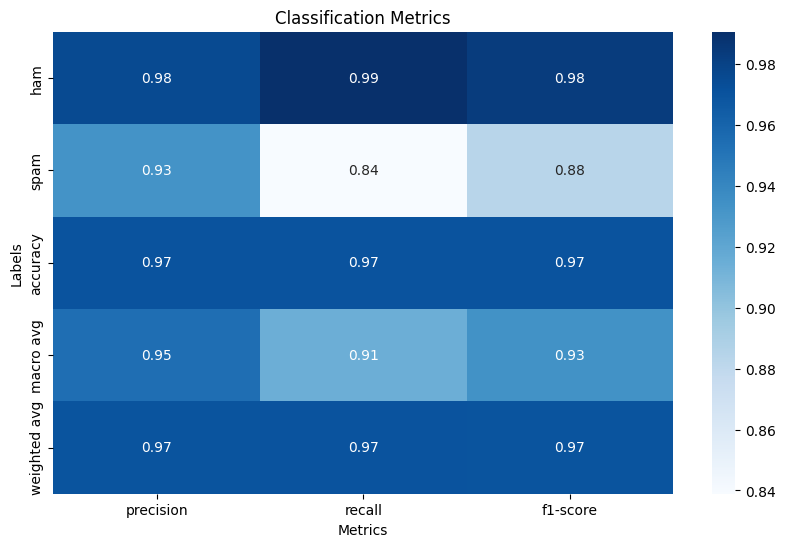

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.drop('support', axis=1, inplace=True)
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Metrics')
plt.ylabel('Labels')
plt.title('Classification Metrics')
plt.show()

# **EMAIL SPAM DETECTION USING STACKING**


### **Important Libraries**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mail_data.csv')

### **Separate features and labels**

In [ ]:
X = df['Message']
y = df['Category']

### **Convert text data into numerical features using CountVectorizer**


In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

### **Split the data into training and testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Define the base classifiers for independent predictions**


In [ ]:
base_classifiers = [
    ('random_forest', RandomForestClassifier()),
    ('extra_trees', ExtraTreesClassifier())
]

### **Define the meta-classifier --> LogisticRegression is being used as the meta-classifier in a stacking ensemble.**



In [ ]:
meta_classifier = LogisticRegression()

### **Create the stacking classifier**

In [ ]:
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

### **Train the stacking classifier**

In [ ]:
stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('random_forest', RandomForestClassifier()),
                               ('extra_trees', ExtraTreesClassifier())],
                   final_estimator=LogisticRegression())

### **Make predictions on the test set**

In [ ]:
y_pred = stacking_classifier.predict(X_test)


### **Calculate accuracy**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9856502242152466


### **Calculate precision**


In [ ]:
precision = precision_score(y_test, y_pred, pos_label='ham')
print("Precision:", precision)

Precision: 0.9876796714579056


### **Calculate recall**

In [ ]:
recall = recall_score(y_test, y_pred, pos_label='ham')
print("Precision:", recall )

Precision: 0.9958592132505176


### **Evaluate the performance of the classifier**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.97      0.92      0.94       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



### **Visualize with Heatmap**

In [ ]:
report_dict = classification_report(y_test, y_pred, output_dict=True)

In [ ]:
df = pd.DataFrame(report_dict).transpose()

In [ ]:
df.drop('support', axis=1, inplace=True)

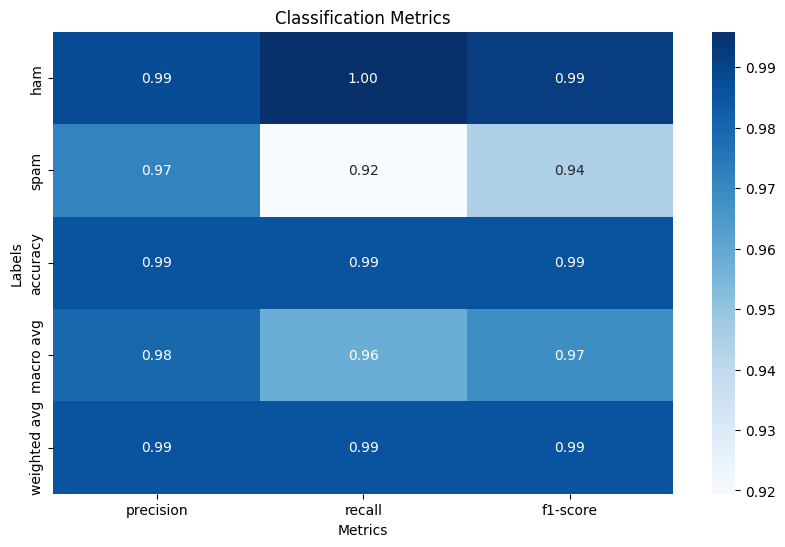

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Metrics')
plt.ylabel('Labels')
plt.title('Classification Metrics')
plt.show()

# **EMAIL SPAM DETECTION BY Random_Forest**

### **Important Libraries**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mail_data.csv')

### **Separate features and labels**

In [ ]:
X= df['Message']
y = df['Category']

## **Split the data into training and testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Create a Random Forest classifier**


In [ ]:
rf_classifier = RandomForestClassifier()

### **Create a TF-IDF vectorizer --> transforms it into a numerical representation**


In [ ]:
vectorizer = TfidfVectorizer()

### **Fit the vectorizer on the training data and transform both the training and testing data**


In [ ]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

### **Initialize and train the RandomForestClassifier**


In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_vectorized, y_train)

RandomForestClassifier()

### **Make predictions on the test data**


In [ ]:
y_pred = rf_classifier.predict(X_test_vectorized)

###**Calculate Accuracy**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9811659192825112


###**Create Evaluation Metrics**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,pos_label='spam')
recall = recall_score(y_test, y_pred,pos_label='spam')
f1 = f1_score(y_test, y_pred,pos_label='spam')


### **Print the evaluation metrics**

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9811659192825112
Precision: 1.0
Recall: 0.8590604026845637
F1-score: 0.9241877256317689


### **Evaluate the performance of the classifier**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.86      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



###**Visualization with Heatmap**

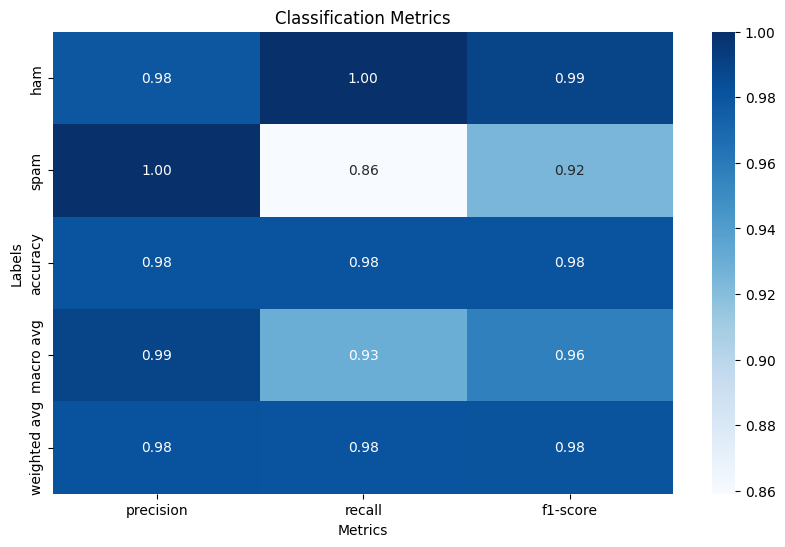

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.drop('support', axis=1, inplace=True)
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Metrics')
plt.ylabel('Labels')
plt.title('Classification Metrics')
plt.show()

# **EMAIL SPAM DETECTION USING Majority Voting Classifier**

### **Important Libraries**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mail_data.csv')

### **Separate features and labels**

In [ ]:
X = df['Message']
y = df['Category']

### **Convert text data into numerical features using CountVectorizer**

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

### **Split the data into training and testing sets**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Define the base classifiers for independent predictions**

In [ ]:
base_classifiers = [
    ('random_forest', RandomForestClassifier()),
    ('gradient_boosting', GradientBoostingClassifier()),
    ('logistic_regression', LogisticRegression())
]

### **Create the majority voting classifier**

In [ ]:
voting_classifier = VotingClassifier(estimators=base_classifiers, voting='hard')


### **Train the majority voting classifier**


In [ ]:
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest', RandomForestClassifier()),
                             ('gradient_boosting',
                              GradientBoostingClassifier()),
                             ('logistic_regression', LogisticRegression())])

### **Make predictions on the test set**


In [ ]:
y_pred = voting_classifier.predict(X_test)

### **Evaluate the model's performance**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,pos_label='spam')
recall = recall_score(y_test, y_pred,pos_label='spam')
f1 = f1_score(y_test, y_pred,pos_label='spam')


### **Calculate Accuracy**

In [ ]:
print("Accuracy:", accuracy)

Accuracy: 0.9829596412556054


### **Print the evaluation metrics**


In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9829596412556054
Precision: 1.0
Recall: 0.87248322147651
F1-score: 0.931899641577061


### **Evaluate the performance of the classifier**


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### **Visualization with Heatmap**

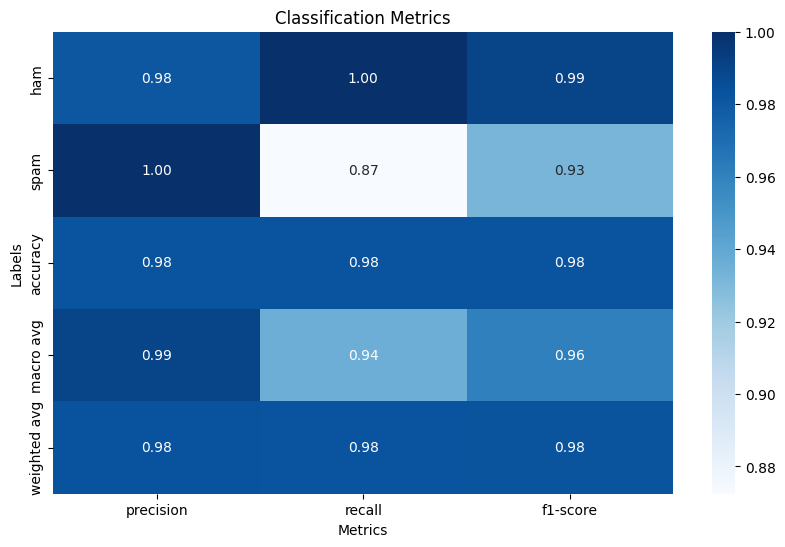

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.drop('support', axis=1, inplace=True)
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Metrics')
plt.ylabel('Labels')
plt.title('Classification Metrics')
plt.show()

# **COMPARATIVE ANALYSIS**

### **Fit the classifiers on the training data**

In [ ]:
adaboost.fit(X_train_vectorized, y_train)
rf_classifier.fit(X_train_vectorized, y_train)
stacking_classifier.fit(X_train_vectorized, y_train)
voting_classifier.fit(X_train_vectorized, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


VotingClassifier(estimators=[('random_forest', RandomForestClassifier()),
                             ('gradient_boosting',
                              GradientBoostingClassifier()),
                             ('logistic_regression', LogisticRegression())])

### **Make predictions on the test data**

In [ ]:
adaboost_pred = adaboost.predict(X_test_vectorized)
random_forest_pred = rf_classifier.predict(X_test_vectorized)
stacking_pred = stacking_classifier.predict(X_test_vectorized)
voting_pred = voting_classifier.predict(X_test_vectorized)

### **Evaluate the performance of each classifier**

In [ ]:
classifiers = ['AdaBoost', 'Random Forest', 'Stacking', 'Voting']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
results = []

In [ ]:
for clf, pred in zip(classifiers, [adaboost_pred, random_forest_pred, stacking_pred, voting_pred]):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, pos_label='spam')
    recall = recall_score(y_test, pred, pos_label='spam')
    f1 = f1_score(y_test, pred, pos_label='spam')
    results.append([accuracy, precision, recall, f1])


### **Create a DataFrame to display the results**


In [ ]:
results_df = pd.DataFrame(results, columns=metrics, index=classifiers)
print(results_df)

               Accuracy  Precision    Recall  F1-score
AdaBoost       0.979372   0.977273  0.865772  0.918149
Random Forest  0.982063   1.000000  0.865772  0.928058
Stacking       0.986547   0.978571  0.919463  0.948097
Voting         0.978475   1.000000  0.838926  0.912409


# **COMPARISON WITH BAR PLOT USING LIGHT COLOURS**

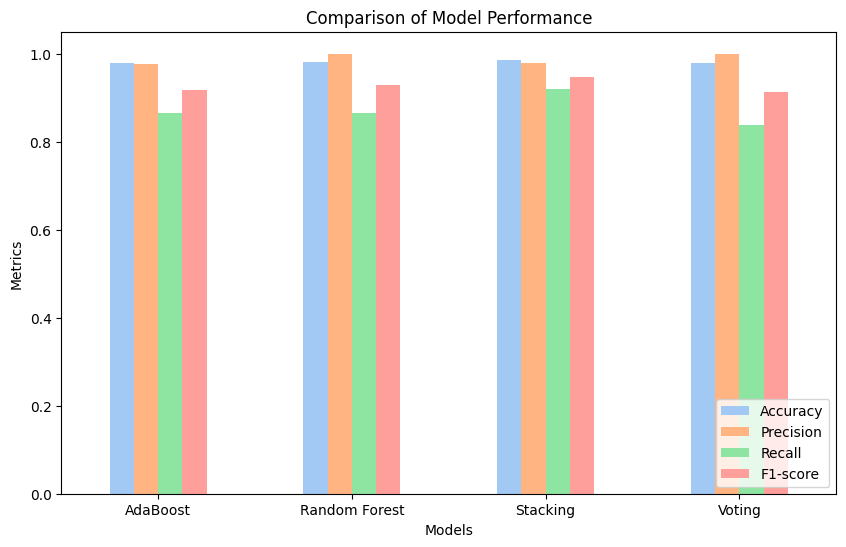

In [ ]:
# Define a light color palette
light_palette = sns.color_palette("pastel")

# Plot the bar plot with light colors
ax = results_df.plot(kind='bar', figsize=(10, 6), color=light_palette)

plt.title('Comparison of Model Performance')
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.xticks(rotation=0)
plt.legend(loc='lower right')

# Show the plot
plt.show()

# **COMPARISON WITH BAR PLOT USING Dark COLOURS**

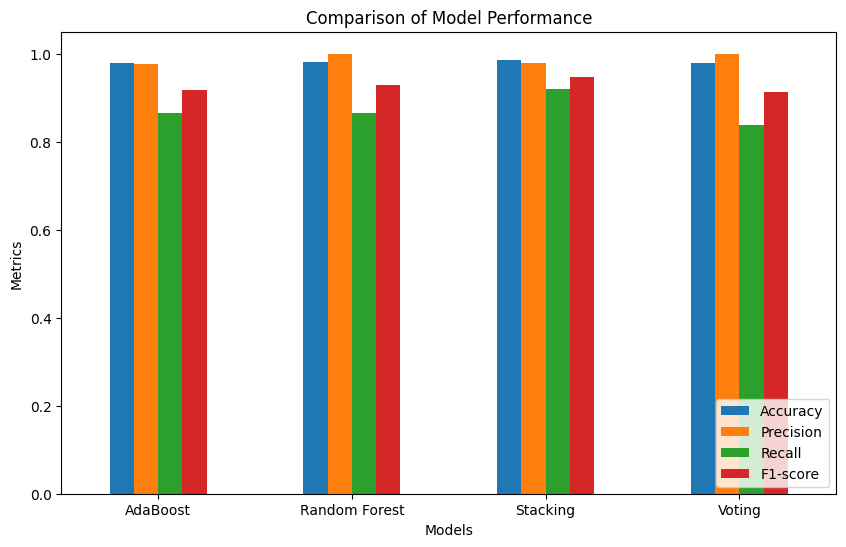

In [ ]:
# Plot the bar plot
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Model Performance')
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
# Show the plot
plt.show()

# **COMPARISON WITH HISTOGRAM**

In [ ]:
classifiers = {
    'AdaBoost': adaboost,
    'Random Forest': rf_classifier,
    'Stacking': stacking_classifier,
    'Voting': voting_classifier
}

predictions = {}
for name, clf in classifiers.items():
    clf.fit(X_train_vectorized, y_train)
    y_pred = clf.predict(X_test_vectorized)
    predictions[name] = y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
accuracies = {}
for name, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.4f}')

AdaBoost Accuracy: 0.9794
Random Forest Accuracy: 0.9812
Stacking Accuracy: 0.9910
Voting Accuracy: 0.9803


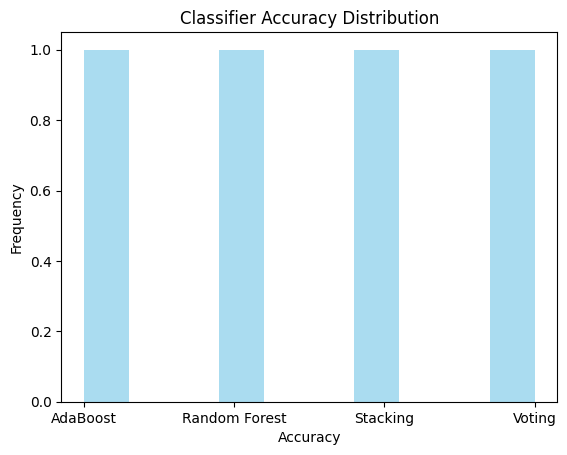

In [ ]:
plt.hist(accuracies, bins=10, alpha=0.7, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Classifier Accuracy Distribution')
plt.show()

# **COMPARISON WITH LINE PLOT**

In [ ]:
classifiers = {
    'AdaBoost': adaboost,
    'Random Forest': rf_classifier,
    'Stacking': stacking_classifier,
    'Voting': voting_classifier
}

In [ ]:
accuracies = []
for name, clf in classifiers.items():
    clf.fit(X_train_vectorized, y_train)
    y_pred = clf.predict(X_test_vectorized)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


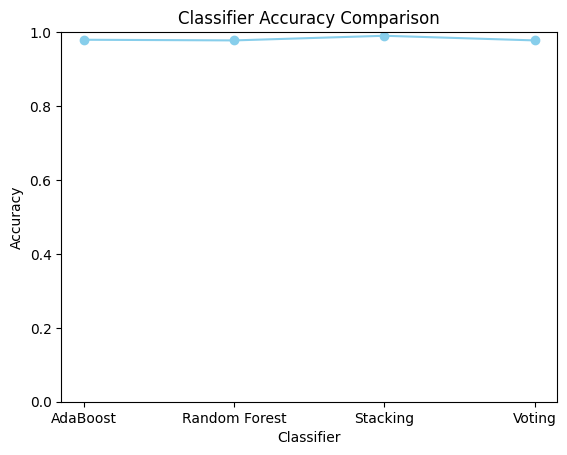

In [ ]:
plt.plot(range(len(classifiers)), accuracies, marker='o', color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.xticks(range(len(classifiers)), classifiers.keys())
plt.ylim([0, 1])
plt.show()

# **COMPARISON WITH PIE CHART**

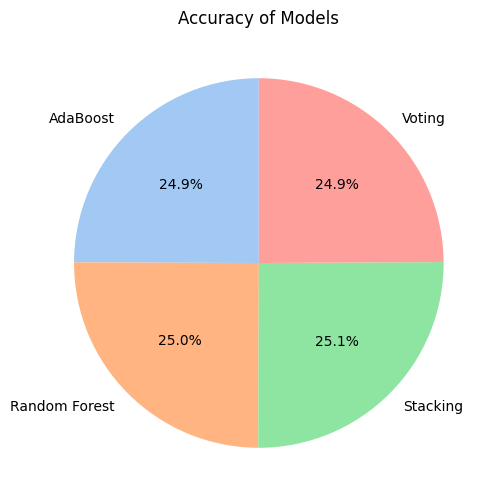

In [ ]:
# Extract accuracy values from the DataFrame
accuracy_values = results_df['Accuracy']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(accuracy_values, labels=results_df.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))

plt.title('Accuracy of Models')

# Show the plot
plt.show()